# Chapter 2  Scripts for running basic experiments on Theory

In [ ]:
#import packages and verify versions

# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)


numpy: 1.21.6
scipy: 1.4.1
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


Automatically created module for IPython interactive environment


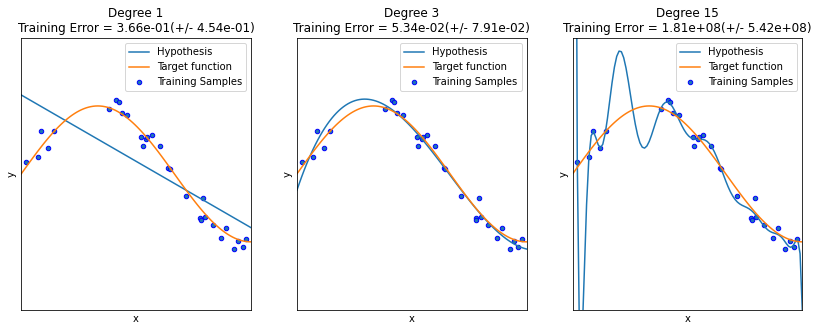

In [ ]:
#plot polynomial function vs sin(X), target function
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
print(__doc__)


#sin function for x
def true_fun(X):
    return np.sin(1.5 * np.pi * X) #sin(x) with added Gaussian noise


np.random.seed(0)

n_samples = 30
degrees = [1, 3, 15]

# Random values in a given shape.
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1) #https://www.w3schools.com/python/matplotlib_subplot.asp
    plt.setp(ax, xticks=(), yticks=()) #https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.setp.html

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    #https://numpy.org/devdocs/reference/constants.html#numpy.newaxis , https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it 
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, 
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100) #Return evenly spaced numbers over a specified interval. https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
    plt.plot(X_test, pipeline.predict(
        X_test[:, np.newaxis]), label="Hypothesis")
    plt.plot(X_test, true_fun(X_test), label="Target function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Training Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nTraining Error = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#the graphy shows that as degrees increases or complexity increases for polynominal function, the function get closer to taget function until Degree 15 which is overgeneralization 

# Bias Variance Error 
Polynomial Regression with degree 1 and degree 12 both trying to fit a target function dawn from sine function in one dimension to illustrate bias, variance and total error

Automatically created module for IPython interactive environment
Poly deg=1: 0.2062 (error) = 0.1870 (bias^2 error)  + 0.0089 (var error) + 0.0098 (noise)
Poly deg=12: 2.5249 (error) = 0.0453 (bias^2 error)  + 2.4698 (var error) + 0.0098 (noise)


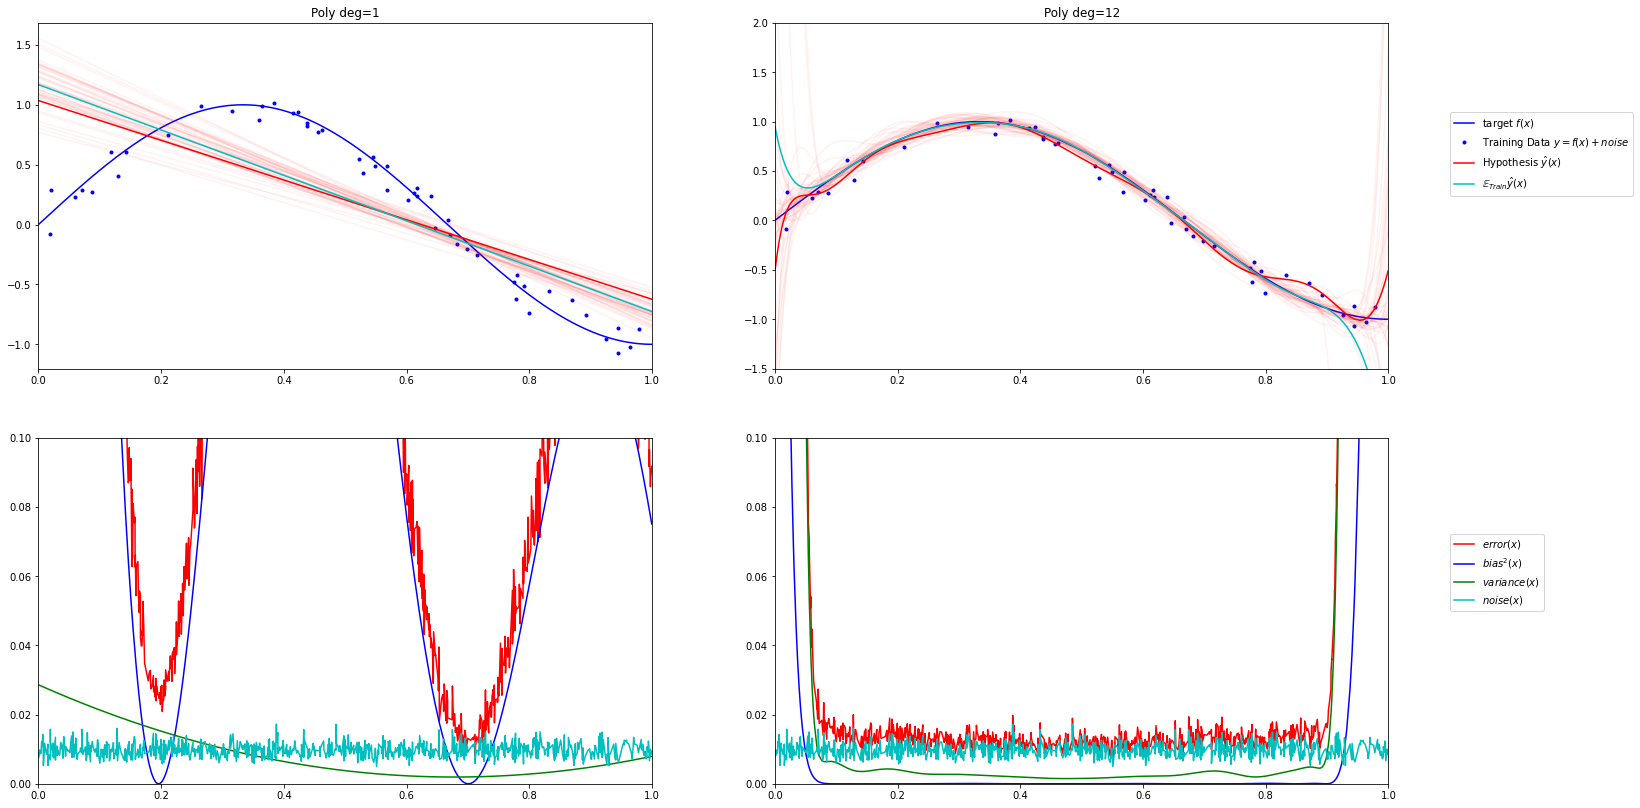

In [ ]:
print(__doc__)

# Author: Gilles Louppe <g.louppe@gmail.com>, Uday Kamath<kamathuday@gmail.com>
# License: BSD 3 clause
# extended this code and changed it to reflect bias, variance and error

import numpy as np
import matplotlib.pyplot as plt



# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# three polynomials with degree 1, 
# and degree 12 polynomial. The impact on bias, variance and error on all three
# can be seen through this example.
polynomial_features1 = PolynomialFeatures(degree=1,include_bias=False) #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

#linear regression with polynomial features
linear_regression1= LinearRegression()
pipeline1 = Pipeline([("polynomial_features", polynomial_features1),("linear_regression", linear_regression1)])

polynomial_features2 = PolynomialFeatures(degree=1,include_bias=False) #not used

polynomial_features3 = PolynomialFeatures(degree=12,include_bias=False)

linear_regression3= LinearRegression()
pipeline3 = Pipeline([("polynomial_features", polynomial_features3),("linear_regression", linear_regression3)])
estimators = [("Poly deg=1", pipeline1), ("Poly deg=12", pipeline3)]

n_estimators = len(estimators) #number of estimators


# Generate data with sine function
def f(x):
    x = x.ravel() #A 1-D array, containing the elements of the input, is returned. A copy is made only if needed. https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

    return np.sin(1.5 * np.pi * x) #https://numpy.org/doc/stable/reference/constants.html


def generate(n_samples, noise, n_repeat=1):
    # Random values in a given shape. Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1). 
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
    X = np.random.rand(n_samples) 
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            # assign random values to each column of the array
            #  Draw random samples from a normal (Gaussian) distribution. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    # reshape to a column array
    X = X.reshape((n_samples, 1)) # Gives a new shape to an array without changing its data. https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

    return X, y


#create training and testing datasets
X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

#creating the dataset with n_repeat is simpler than the for_each before
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

#set plot figuresize
plt.figure(figsize=(30, 14))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators): #https://www.geeksforgeeks.org/enumerate-in-python/
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    #train and predict polynominal regression models
    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)
    for i in range(n_repeat):
        for j in range(n_repeat):
            #total error is test y - predicted y
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2 #adding numpy arrays https://stackoverflow.com/questions/35910577/why-does-python-numpys-mutate-the-original-array#:~:text=Numpy%20arrays%20are%20mutable%20objects,the%20operation%20is%20a%20%3D%20np.

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1) #noise is the variance of y-test https://numpy.org/doc/stable/reference/generated/numpy.var.html
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2 error) "
          " + {3:.4f} (var error) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    # the top graph plot x_test vs predicted f(x_test) and actual values
    plt.subplot(2, n_estimators, n + 1) #https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplot.html
    plt.plot(X_test, f(X_test), "b", label="target $f(x)$") #blue line https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html
    plt.plot(X_train[0], y_train[0], ".b", label="Training Data $y = f(x)+noise$") #blue dots

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label="Hypothesis $\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05) #alpha change the line opacity https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label="$\mathbb{E}_{Train} \^y(x)$") #mathematical format

    plt.xlim([0, 1])
    plt.title(name)

    #if the second model, add legend to the right
    if n == n_estimators - 1:
        plt.ylim([-1.5,2])
        plt.legend(loc=(1.1, .5))

    #the bottom graph plot x_text vs the errors of predicted f(x_test)
    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    #Get or set the x and y limits of the current axes. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html
    plt.xlim([0, 1])
    plt.ylim([0, 0.1]) #used to be 0.06. set higher to show more errors of poly=1

    #if the second model, add legend to the right
    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75) #https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
plt.show()

# poly=1 model has higher bias and lower variance errors, but poly=2 model has more total error because it has lower bias and higher variance errors

# The graphs show h(x) vs f(x). h(x) is polynominal regression. f(y) is a one-dimensional sine function with added Gaussian noise.
# For the first line of graph, poly=1 leads to underfitting while poly=12 leads to overfitting

# For the second line of graphs, they plot x_text vs the errors of predicted f(x_test)
# for poly=1, there is only low bias and general error when the h(X) intersect the f(x)
# for poly=2, there is high bias and general error at the min and max of the test sample

# Feature Transformation and Linear Model in transformed Z space showing Kernels in action

Automatically created module for IPython interactive environment


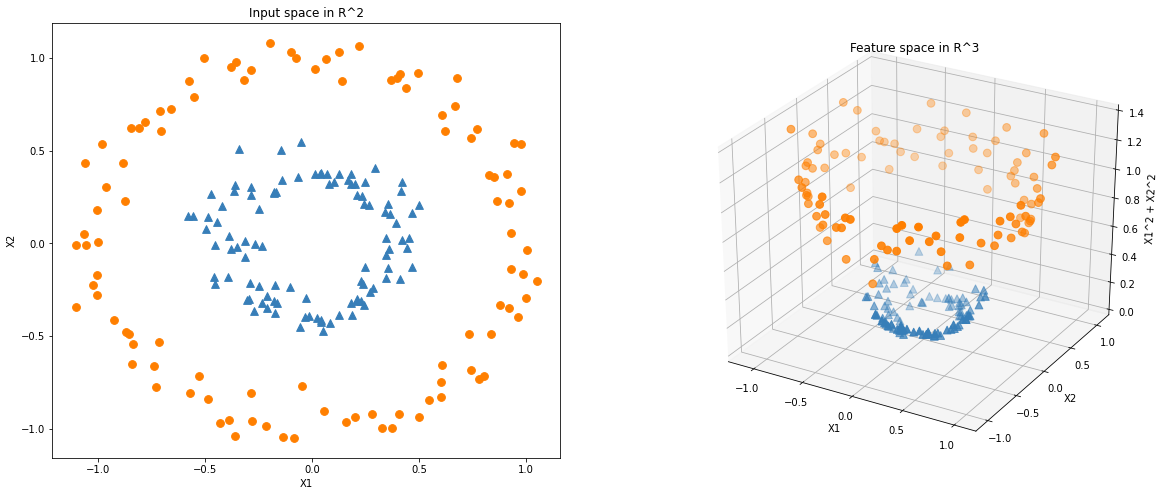

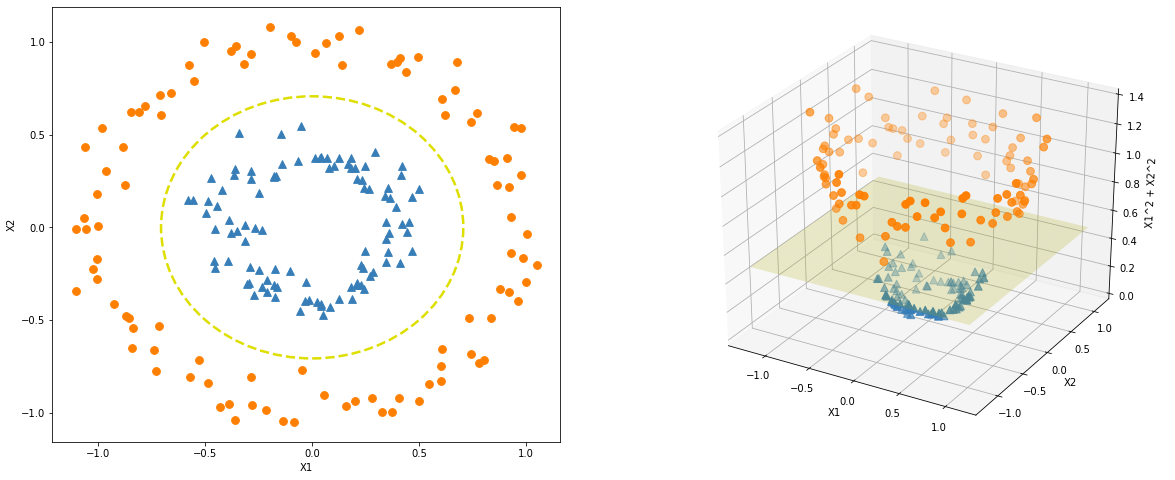

In [ ]:
print(__doc__)

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from sklearn.datasets import make_circles



def transform(x1, x2):
    # Transforms a kernel phi(x1,x2) = [x1, x2, x1^2 + x2^2] """
    return np.array([x1, x2, x1**2.0 + x2**2.0])


#generate sample and class    
n = 200
sample, label = make_circles(n_samples=n, noise=0.07, factor=0.4) # Make a large circle containing a smaller circle in 2d. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

#separated out classes of X based on Y
A = sample[np.where(label == 0)]
B = sample[np.where(label == 1)]

#creates x,y coordinates
X0_orig = A[:, 0]
Y0_orig = A[:, 1]

X1_orig = B[:, 0]
Y1_orig = B[:, 1]


#make z coordinate off x and y
A = np.array([transform(x,y) for x,y in zip(np.ravel(X0_orig), np.ravel(Y0_orig))])
X0 = A[:, 0]
Y0 = A[:, 1]
Z0 = A[:, 2]

A = np.array([transform(x,y) for x,y in zip(np.ravel(X1_orig), np.ravel(Y1_orig))])
X1 = A[:, 0]
Y1 = A[:, 1]
Z1 = A[:, 2]

x = np.arange(-1.25, 1.25, 0.1)
y = np.arange(-1.25, 1.25, 0.1)
X, Y = np.meshgrid(x, y) #Return coordinate matrices from coordinate vectors. https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

Z = np.zeros(X.shape)
Z[:,:] = 0.5 #all rows and columns updated to 0.5

#Plot without Decision Boundary, the top graphs
# Project data to X/Y/Z plane
fig = plt.figure(figsize=(20,8)) # figure contains subplots. https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.figure.html
ax = fig.add_subplot(122, projection='3d')

# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html
ax.scatter(X0, Y0, Z0,s=60, c='#ff7f00', marker='o')
ax.scatter(X1, Y1, Z1,s=60, c='#377eb8', marker='^')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1^2 + X2^2')
ax.set_title("Feature space in R^3")

# Project data to X/Y plane
#plt.figure(figsize=(10,4))
ax2d = fig.add_subplot(121)
ax2d.scatter(X0, Y0, c='#ff7f00', s=60,marker='o')
ax2d.scatter(X1, Y1, c='#377eb8',s=60, marker='^')

ax2d.set_xlabel('X1')
ax2d.set_ylabel('X2')
ax2d.set_title("Input space in R^2")

plt.show()


# Plot with Decision Boundary, the bottom graphs
fig = plt.figure(figsize=(20,8))
# Project data to X/Y plane
ax2d = fig.add_subplot(121)
ax2d.scatter(X0, Y0, c='#ff7f00', s=60,marker='o')
ax2d.scatter(X1, Y1, c='#377eb8',s=60, marker='^')


ax2d.add_patch(plt.Circle((0,0), radius=sqrt(0.5), #Decision Boundary, https://www.geeksforgeeks.org/matplotlib-axes-axes-add_patch-in-python/
               fill=False, linestyle='dashed', linewidth=2.5,
               color='#dede00'))

ax2d.set_xlabel('X1')
ax2d.set_ylabel('X2')
#ax2d.set_title("Input space in R^2")

# Project data to X/Y/Z plane
#plt.figure(figsize=(10,4))
ax = fig.add_subplot(122, projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1^2 + X2^2')
#ax.set_title("Feature space in R^3")
ax.scatter(X0, Y0, Z0,s=60, c='#ff7f00', marker='o')
ax.scatter(X1, Y1, Z1,s=60, c='#377eb8', marker='^')
ax.plot_surface(X, Y, Z, color='#dede00', alpha=0.2, antialiased=True) #Decision Boundary, https://www.studytonight.com/matplotlib/matplotlib-3d-surface-plot-plot_surface-function

plt.show()


# Optimization using Gradient Descent

In [ ]:
import numpy
#example of numpy dot tranpose and dot product
a = np.array([[1,2], [3,4], [5,6]])
print("the array of a\n", a)
print("the shape of a:", a.shape)
print("the array of the tranpose of a (a.T)\n", a.T) #https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
print("the shape of a.T:", a.T.shape)

b = np.array([1,2,3])
print("the array of b\n", b)
print("the shape of b:", b.shape)

print("the dot product of a.T and b (If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b") #https://numpy.org/doc/stable/reference/generated/numpy.dot.html
print("[(1*1)+(3*2)+(5*3), (2*1)+(4*2)+(6*3)] = ", a.T.dot(b))

the array of a
 [[1 2]
 [3 4]
 [5 6]]
the shape of a: (3, 2)
the array of the tranpose of a (a.T)
 [[1 3 5]
 [2 4 6]]
the shape of a.T: (2, 3)
the array of b
 [1 2 3]
the shape of b: (3,)
the dot product of a.T and b (If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b
[(1*1)+(3*2)+(5*3), (2*1)+(4*2)+(6*3)] =  [22 28]


Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


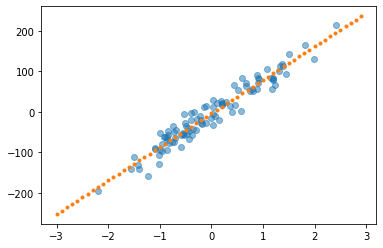

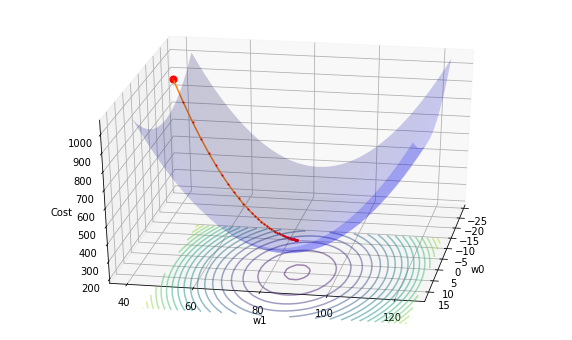

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

from sklearn.datasets import make_regression

#code adapted from https://tillbe.github.io/python-gradient-descent.html
x, y = make_regression(n_samples = 100, #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)

#flatten x.shape of (100,1) to (100,)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
#best_fit is a linear regression model
best_fit = np.vectorize(lambda x: x * slope + intercept) #https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html
plt.plot(x,y, 'o', alpha=0.5) #alpha is for opacity https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/#:~:text=Matplotlib%20allows%20you%20to%20regulate,such%20as%200.5%20or%200.25.
#create an evenly space array from -3 to 3
grid = np.arange(-3,3,0.1) #https://numpy.org/doc/stable/reference/generated/numpy.arange.html
plt.plot(grid,best_fit(grid), '.') # '.' is point marker, Format Strings option

#code adapted from https://tillbe.github.io/python-gradient-descent.html
def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    #x is the xaug. shape (100, 2)
    costs = [] # to store all costs
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = [] # to store all predictions
    counter = 0
    old_cost = 0
    # prediction via the dot product of x and theta, intercept and slope
    # example,(xaug[0][0] * theta_i[0]) + (xaug[0][1] * theta_i[1]) or (1.*-14.63962567) + (0.03225343*40.5110735)
    pred = np.dot(x, theta)
    error = pred - y #array subtraction
    #cost = error squared divided by 2(number of data points)
    current_cost = np.sum(error ** 2) / (2 * m) #Sum of array elements over a given axis https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    preds.append(pred)
    costs.append(current_cost)
    history.append(theta)
    counter+=1
    #run while absolute cost is higher than precision
    while abs(current_cost - old_cost) > precision:
        old_cost=current_cost

        # tranposed array https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html 
        # https://stackoverflow.com/questions/44635136/python-t-dot-numpy-syntax-understanding
        # dot product of the transposed-x array and error array. This dot product is divided by size of the array (m)
        # x.shape of (100,2) is transformed to (2,100) for x.T.shape
        # error.shape is (100,)
        # x.T.dot(error).shape is (2,)
        gradient = x.T.dot(error)/m  
        theta = theta - step * gradient  # update of intercept and slope
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        #cost = error squared divided by 2(number of data points)
        current_cost = np.sum(error ** 2) / (2 * m)
        costs.append(current_cost)
        
        # when counter reach 25 via 25%25 = 0 or when the remainder of 25/25=0, add pred to preds 
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        #if there are max steps > 0, stop when counter reach it
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

# x.shape[0] is 100
# np.ones(x.shape[0]) make a 100-length array filled with 1.
# np.c_ pairs each x record with a 1. Shape of (100,2). For np.c_, arrays will be stacked along their last axis
xaug = np.c_[np.ones(x.shape[0]), x]  #https://numpy.org/doc/stable/reference/generated/numpy.c_.html
# theta_i is the inital guess for intercept and slope
theta_i = [-15, 40] + np.random.rand(2) #np.random.rand(2) = Random values in a given shape, (2,)

history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1] #grab the lastest and best theta

#compare intercept & slope found by gradient descent vs. least squares
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

from mpl_toolkits.mplot3d import Axes3D

def error(x, y, THETA):
     # X or xaug.shape (100, 2)
    # y.shape (100,)
    # THETA.shape (2,)   
    return np.sum((x.dot(THETA) - y)**2)/(2*y.size)

# Return evenly spaced numbers over a specified interval. Returns num evenly spaced samples, calculated over the interval [start, stop]. #https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20) # m for intercept. ms.shape is (20,)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40) # b for slope. bs.shape is (40,)

# Return coordinate matrices from coordinate vectors.
# Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
M, B = np.meshgrid(ms, bs)  #M.shape and B.shape are both (40, 20)

# z coordinate for error
# zs is array of error for x, y, theta (M,B)
# zs.shape is (800,). That is reshaped to match M, (40, 20)
zs = np.array([error(xaug, y, theta) for theta in zip(np.ravel(M), np.ravel(B))]) #ravel return a contiguous flattened array. #https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
Z = zs.reshape(M.shape) 

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# draw a 3D surface
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2) #https://matplotlib.org/3.5.0/gallery/mplot3d/surface3d.html
# draw contour lines and filled contours, respectively
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30) #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html

ax.set_xlabel('w0') #intercept
ax.set_ylabel('w1') #slope
ax.set_zlabel('Cost') #error #https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
# Set the elevation and azimuth of the axes in degrees (not radians).
# This can be used to rotate the axes programmatically.
ax.view_init(elev=30., azim=10) #https://matplotlib.org/3.5.0/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html#mpl_toolkits.mplot3d.axes3d.Axes3D.view_init

# marker option: 'o' for circle, '.' for point https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.markers
# color option: https://matplotlib.org/3.5.0/tutorials/colors/colors.html

# this plot the initial red point at the top left
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);

# this plot the continous descent
ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
plt.show()

In [ ]:
np.ravel(M), np.ravel(B)

# Optimization using Stochastic Gradient Descent

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


gradient: [-24.80724978  -0.80011882]
x[i]: [1.         0.03225343]
y[i]: 11.534851890155354
pred: -13.272397889405537
error: -24.80724977956089
current_cost = np.sum(error ** 2) / 2): 307.6998208127619
start
counter: 1
costs [307.6998208127619]
old_cost 0


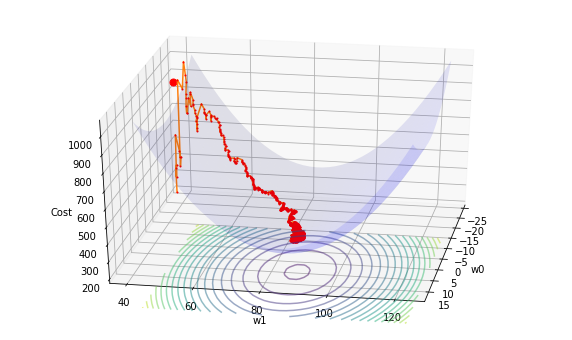

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.datasets import make_regression


def sgd(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size  # number of data points
    old_theta = 0
    # theta, intercept and slope
    theta = theta_init
    history = []  # to store all thetas
    preds = []
    grads = []
    counter = 0
    old_cost = 0
    epoch = 0
    i = 0  # index
    # x.shape is (100,2)
    # x[i, :].shape is (2,)
    # theta.shape is (2,)
    # pred shape is (), a scalar
    # np.dot(x[i, :], theta) = (x[i, :][0]*theta[0]) + (x[i, :][1]*theta[1]) = (-3.72555938  * 1.) + (82.7969409 * 0.03225343)
    pred = np.dot(x[i, :], theta)
    error = pred - y[i]
    # x[i, :].T.shape is (2,)
    # error.shape is (), a scalar
    # gradient.shape is (2,)
    gradient = x[i, :].T * error
    grads.append(gradient)
    print("gradient:", gradient) 
    print("x[i]:", x[i])
    print("y[i]:", y[i])
    print("pred:", pred)
    print("error:", error)
    print("current_cost = np.sum(error ** 2) / 2):", np.sum(error ** 2) / 2)
    current_cost = np.sum(error ** 2) / 2
    counter += 1
    preds.append(pred)
    cost_sum = current_cost
    costs.append(cost_sum / counter)
    history.append(theta)
    print("start") 
    print("counter:", counter)
    print("costs", costs)
    print("old_cost", old_cost)
    while True:
        gradient = x[i, :].T * error
        grads.append(gradient)
        old_theta = theta
        theta = theta - step * gradient  # update
        history.append(theta)
        i += 1
        if i == m:  # reached one past the end.
            # break
            epoch += 1
            #Randomly permute a sequence, or return a permuted range. https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
            neworder = np.random.permutation(m) 
            #rearrange the order
            x = x[neworder]
            y = y[neworder]
            i = 0
        pred = np.dot(x[i, :], theta)
        error = pred - y[i]
        current_cost = np.sum(error ** 2) / 2

        if counter % 25 == 0:
            preds.append(pred)
        counter += 1
        cost_sum += current_cost
        old_cost = costs[counter - 2]
        costs.append(cost_sum / counter)
        if maxsteps:
            if counter == maxsteps:
                break

    return history, costs, preds, grads, counter, epoch


def error(X, Y, THETA):
    # X or xaug.shape (100, 2)
    # y.shape (100,)
    # THETA.shape (2,)
    return np.sum((X.dot(THETA) - Y)**2) / (2 * Y.size)


ms = np.linspace(theta[0] - 20, theta[0] + 20, 20) # m for intercept. ms.shape is (20,)
bs = np.linspace(theta[1] - 40, theta[1] + 40, 40) # b for slope. bs.shape is (40,)

M, B = np.meshgrid(ms, bs)  #M.shape and B.shape are both (40, 20)

# z coordinate for error
# zs.shape is (800,). That is reshaped to match M, (40, 20)
zs = np.array([error(xaug, y, theta) for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# draw a 3D surface
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.1)
# draw contour lines and filled contours, respectively
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

#use the dataset from the previous gradient descent example
history2, cost2, preds2, grads2, iters2, epoch2 = sgd( xaug, y, theta_i, maxsteps=5000, step=0.01)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
# Set the elevation and azimuth of the axes in degrees (not radians).
# This can be used to rotate the axes programmatically.
ax.view_init(elev=30., azim=20)
# this plot the initial red point at the top left
ax.plot([history[0][0]],
        [history[0][1]],
        [cost[0]],
        markerfacecolor='r',
        markeredgecolor='r',
        marker='o',
        markersize=7)

# this plot the Stochastic descent
ax.view_init(elev=30., azim=10)
ax.plot([t[0] for t in history2], [t[1] for t in history2], cost2,
        markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
plt.show()
